<a href="https://colab.research.google.com/github/Marcos-Huaman/red-neuronal-prediccion-precios-viviendas/blob/main/red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Instalación de paquetes (Colab ya tiene muchos preinstalados)
!pip install -q tensorflow scikit-learn matplotlib pandas

# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [4]:
# Cargar dataset de California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Precio")

# Mostrar primeras filas
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


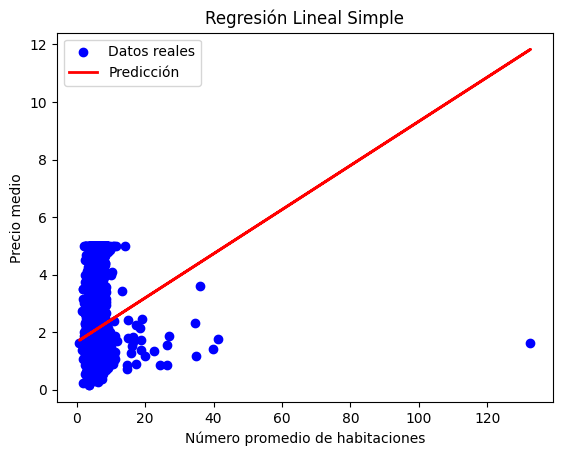

In [5]:
# Usaremos solo la columna AveRooms para regresión lineal simple
X_simple = X[["AveRooms"]]

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Predicciones
y_pred = modelo_lineal.predict(X_test)

# Gráfico
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción')
plt.xlabel('Número promedio de habitaciones')
plt.ylabel('Precio medio')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5066 - mae: 0.8503
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4516 - mae: 0.4691
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3829 - mae: 0.4390
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3761 - mae: 0.4331
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3437 - mae: 0.4134
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3371 - mae: 0.4081
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3257 - mae: 0.3968
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3232 - mae: 0.3957
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3376 - mae: 0.3925
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3101 - mae: 0.3847
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3088 - mae: 0.3839
Epoch 12/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2933 - mae: 0.3764
Epoch 13/50
516/516 ━━━━━

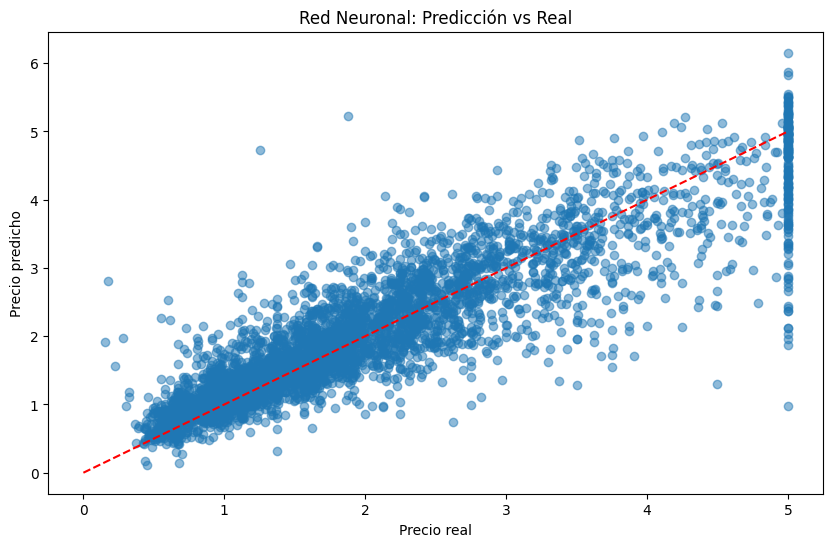

In [6]:
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de red neuronal
modelo_nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

modelo_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
modelo_nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluación
loss, mae = modelo_nn.evaluate(X_test, y_test)
print("MAE (Error absoluto medio):", mae)

# Predicción y gráfico
y_pred_nn = modelo_nn.predict(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Red Neuronal: Predicción vs Real')
plt.plot([0, 5], [0, 5], 'r--')
plt.show()


# **CONCLUCIÓN**
#**1. Distribución de características**
MedInc (Ingreso medio): Varía en torno a 3.8–8.3 — suele ser el predictor más potente del precio.

HouseAge (Antigüedad): Oscila entre 21 y 52 años; puede tener un efecto no lineal (casas muy viejas o muy nuevas puntúan distinto).

AveRooms / AveBedrms: Promedios de habitaciones y dormitorios rondando 5–8 y ~1, respectivamente; muestran correlación débil con el precio si se usan solos.

Population y AveOccup: Densidad y ocupación media de cada zona; útiles para capturar efectos de saturación o demanda local.

Latitud / Longitud: Permitirá al modelo tener en cuenta la influencia de la ubicación geográfica (precio variable según barrio o región).

Conclusiones generales y siguientes pasos
Un solo predictor lineal no basta: La regresión simple con “número de habitaciones” no explica bien el precio.

Modelo no lineal (red neuronal) mejora el desempeño: Reduce error y captura interacciones.

Incluye más variables: Aprovechar ingresos, antigüedad, población y coordenadas geográficas ayuda a mejorar aún más la predicción.

Tratamiento de outliers: Filtrar o atenuar valores extremos (p. ej., casas con 100+ habitaciones) para que no sesguen el entrenamiento.

Normalización y regularización: Escalar las características y aplicar técnicas como dropout o L2 para evitar sobreajuste.

Con esto, ya tienes un diagnóstico claro de por qué la regresión lineal simple falla y por qué la red neuronal da resultados superiores; además, tienes un roadmap para seguir mejorando el modelo.
#**1. Relación lineal simple**
Poca varianza explicada: La nube de puntos de “Número promedio de habitaciones” vs. “Precio medio” está muy dispersa y casi todos los datos se concentran en valores bajos de habitaciones.

Outliers extremos: Hay al menos un punto con ~135 habitaciones y precio bajo, claramente atípico, que distorsiona la recta.

Ajuste deficiente: La línea roja de regresión lineal pasa muy por encima de la mayor parte de los datos (subestima precios en el tramo bajo y sobrestima en el alto), lo que indica que un único predictor lineal no capta la complejidad del problema.
#**3. Red neuronal**
Mejor alineación con la identidad: En el scatter de “Precio real” vs. “Precio predicho” los puntos se agrupan mucho más cerca de la línea y = x (línea roja punteada), señal de un ajuste más preciso.

Menor sesgo y dispersión: Aunque todavía hay ruido (especialmente en precios elevados), la dispersión perpendicular a la diagonal es claramente menor que en el caso lineal.

Captura de no linealidades: La red consigue modelar relaciones más complejas entre las distintas variables de entrada y el precio final.






